# Description

This notebook creates the figure that use to show how our results relate to prior work that has used NBS to look for significant differences in connectivity between clinical and healthy populations.

In [1]:
import pandas as pd
import numpy as np
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
nbs_lit_search_path = '../resources/nbs_literature_search/NBS_Papers_Top50.csv'

In [3]:
nbs_lit = pd.read_csv(nbs_lit_search_path)

In [4]:
nbs_lit = nbs_lit.replace('?',np.nan)
nbs_lit = nbs_lit.replace('NaN',np.nan)

In [5]:
nbs_lit = nbs_lit.infer_objects()

In [6]:
nbs_lit = nbs_lit[['% Sig. Edges', '% Sig. Nodes']].copy()

In [7]:
nbs_lit['% Sig. Edges'] = nbs_lit['% Sig. Edges'].str.rstrip('%').astype('float')
nbs_lit['% Sig. Nodes'] = nbs_lit['% Sig. Nodes'].str.rstrip('%').astype('float')

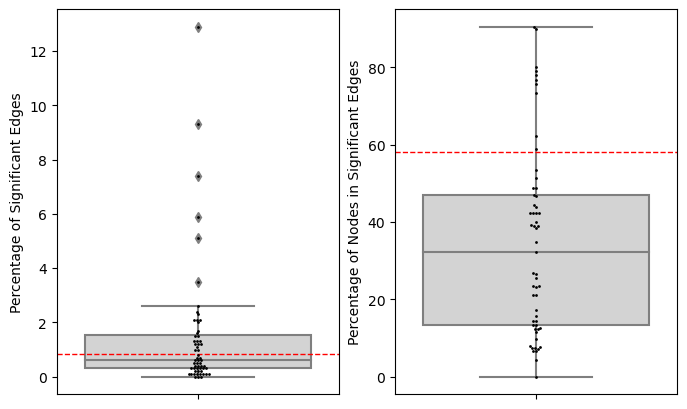

In [8]:
fig, axs = plt.subplots(1,2,figsize=(8,5))
# Percent Significant Connections in NBS analysis
sns.boxplot(data=nbs_lit,y='% Sig. Edges', color='lightgray', ax=axs[0])
sns.swarmplot(data=nbs_lit,y='% Sig. Edges',c ='k', s=2,ax=axs[0])
axs[0].set_ylabel('Percentage of Significant Edges')
axs[0].axhline(y=100*590/(380*379/2), color='r', linestyle='--', linewidth=1)
# Percentage of Significant Nodes in NBS analysis
sns.boxplot(data=nbs_lit,y='% Sig. Nodes', color='lightgray', ax=axs[1])
sns.swarmplot(data=nbs_lit,y='% Sig. Nodes',c ='k', s=2, ax=axs[1])
axs[1].set_ylabel('Percentage of Nodes in Significant Edges')
axs[1].axhline(y=100*221/380, color='r', linestyle='--', linewidth=1)